<a href="https://colab.research.google.com/github/abhiyantaabhishek/test/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Test_data.zip

In [67]:
!ls Test_data/

Test  Train  Val


In [ ]:
!mv Test_data/Sample_Submission.csv Sample_Submission.csv

In [68]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix
import cv2

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ( EarlyStopping, ModelCheckpoint,ReduceLROnPlateau)
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import tensorflow as tf

In [70]:
classess = os.listdir("Test_data/Train/")
classess

['car', 'animal', 'truck', 'human', 'airplane']

In [71]:
for class_ in classess:
  img_path = os.path.join("Test_data/Train/",class_)
  print( "No of Img Train:", len(os.listdir(img_path)),',',class_)

No of Img Train: 194 , car
No of Img Train: 194 , animal
No of Img Train: 194 , truck
No of Img Train: 194 , human
No of Img Train: 194 , airplane


In [72]:
for class_ in classess:
  img_path = os.path.join("Test_data/Val/",class_)
  print( "No of Img Val:", len(os.listdir(img_path)),',',class_)

No of Img Val: 582 , car
No of Img Val: 582 , animal
No of Img Val: 582 , truck
No of Img Val: 582 , human
No of Img Val: 582 , airplane


In [174]:
train_images = []
train_labels = []
val_images = []
val_labels = []
test_images = []
test_labels = []
test_images_path =[]
for root, dirs, files in os.walk("Test_data"):
   for name in files:
      full_path = os.path.join(root, name)
      data_type = full_path.split(os.sep)[1]
      img = plt.imread(full_path)
      if(data_type == "Train"):
        label = full_path.split(os.sep)[2]
        train_images.append(img)
        train_labels.append(label)
      elif ( data_type == "Val"):
        label = full_path.split(os.sep)[2]
        val_images.append(img)
        val_labels.append(label)
      else:
        test_images.append(img)
        test_images_path.append(full_path)

In [175]:
train_images = np.array(train_images)
val_images = np.array(val_images)
test_images = np.array(test_images)
lb = LabelBinarizer()
lb.fit(train_labels)
print(lb.classes_)
train_label_onehot = lb.transform(train_labels)
val_label_onehot = lb.transform(val_labels)

['airplane' 'animal' 'car' 'human' 'truck']


In [176]:
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
assert len(train_images) == len(train_labels)
assert len(val_images) == len(val_labels)

(970, 96, 96)
(2910, 96, 96)
(1940, 96, 96)


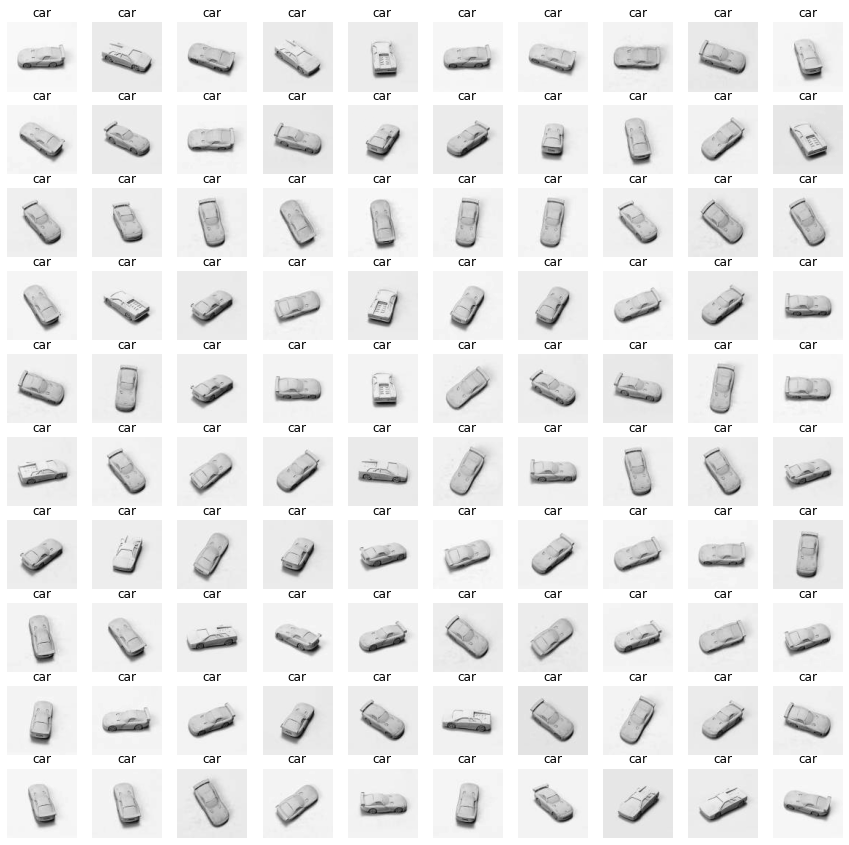

In [76]:
fig, axs = plt.subplots(10, 10,figsize=(15,15))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(train_images[i*10+j],cmap=plt.cm.gray)
    axs[i,j].set_title(lb.classes_[train_label_onehot[i*10+j].argmax()])
    axs[i,j].axis('off')


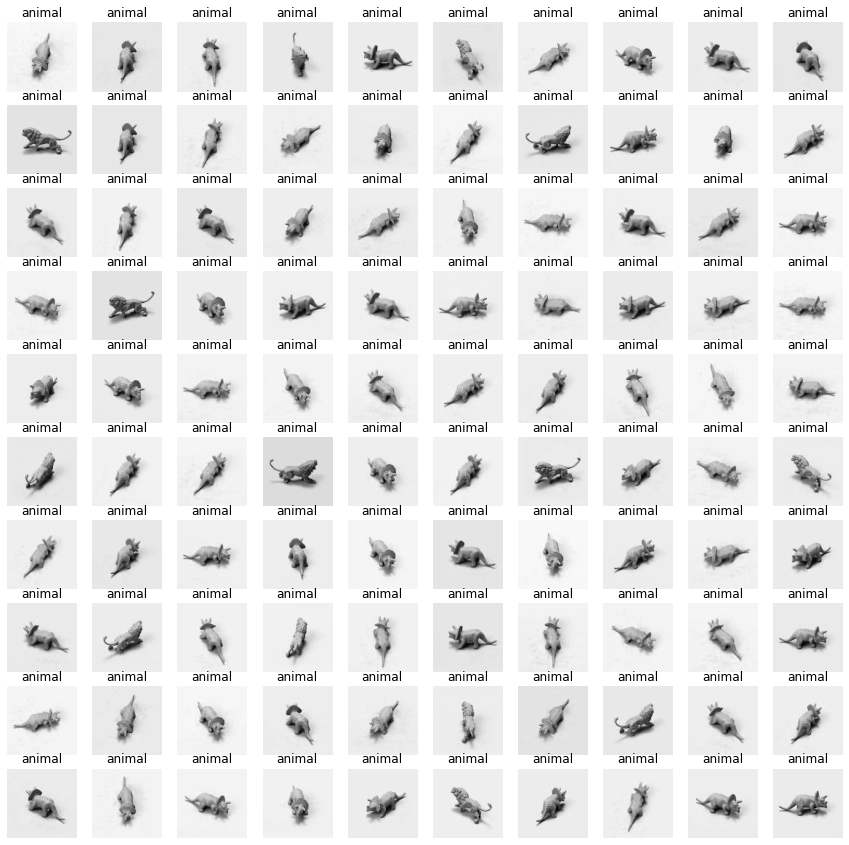

In [77]:
fig, axs = plt.subplots(10, 10,figsize=(15,15))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(train_images[200+i*10+j],cmap=plt.cm.gray)
    axs[i,j].set_title(lb.classes_[train_label_onehot[200+i*10+j].argmax()])
    axs[i,j].axis('off')


10


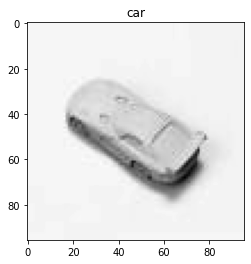

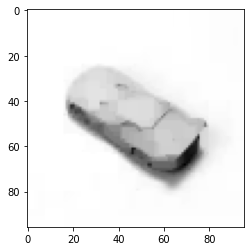

In [78]:

ind = 10
print(ind)
img = train_images[ind]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.imshow(img,cmap=plt.cm.gray)
plt.title(lb.classes_[train_label_onehot[ind].argmax()])
plt.show()

plt.imshow(opening,cmap=plt.cm.gray)
plt.show()

In [177]:
for ind in range (len(train_images)):
  img = train_images[ind]
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
  opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
  train_images[ind] = opening
for ind in range (len(val_images)):
  img = val_images[ind]
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
  opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
  val_images[ind] = opening
for ind in range (len(test_images)):
  img = test_images[ind]
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
  opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
  test_images[ind] = opening

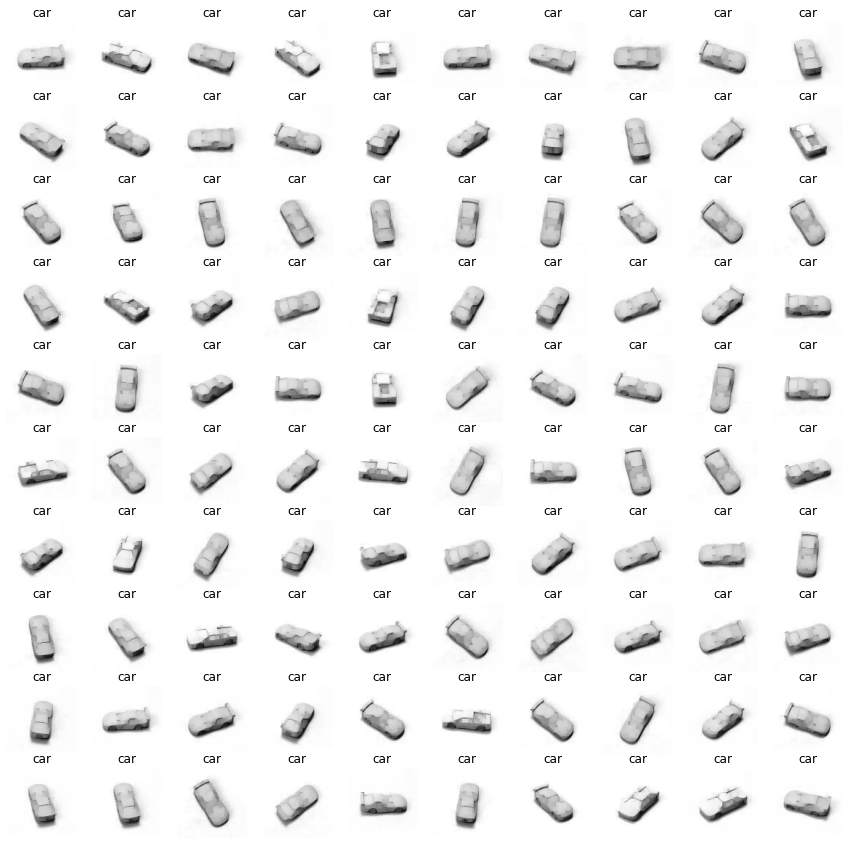

In [80]:
fig, axs = plt.subplots(10, 10,figsize=(15,15))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(train_images[i*10+j],cmap=plt.cm.gray)
    axs[i,j].set_title(lb.classes_[train_label_onehot[i*10+j].argmax()])
    axs[i,j].axis('off')

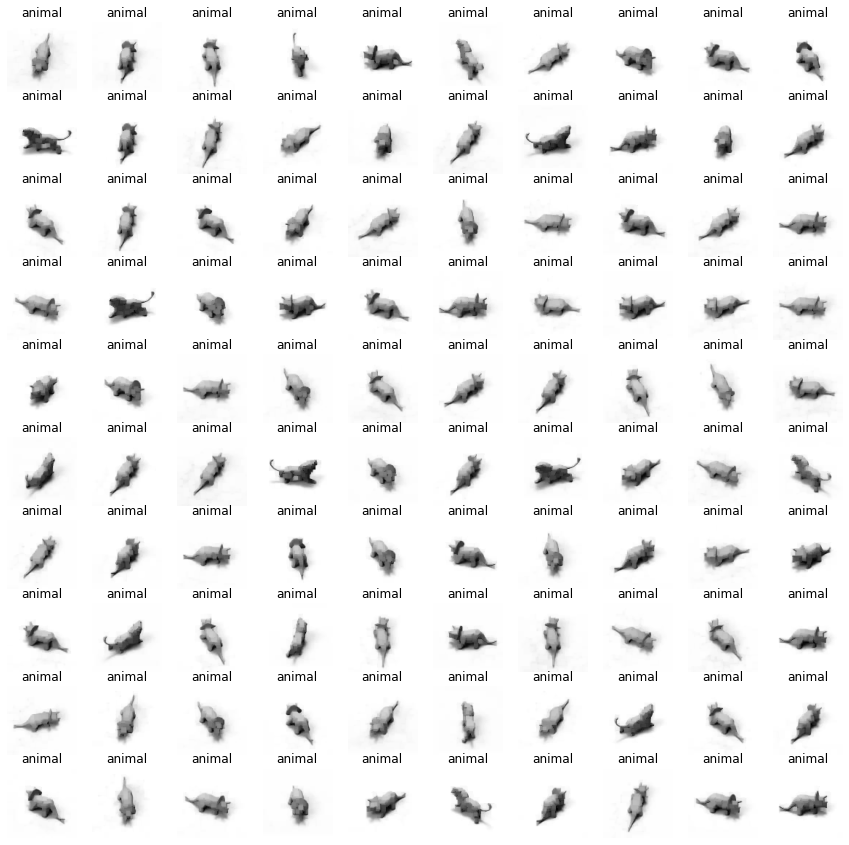

In [81]:
fig, axs = plt.subplots(10, 10,figsize=(15,15))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(train_images[200+i*10+j],cmap=plt.cm.gray)
    axs[i,j].set_title(lb.classes_[train_label_onehot[200+i*10+j].argmax()])
    axs[i,j].axis('off')


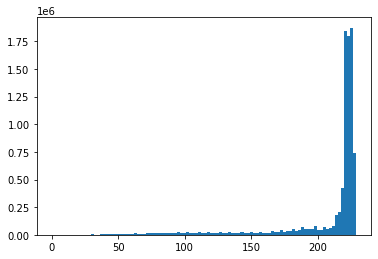

In [82]:
hist = plt.hist(train_images.flatten(),bins=100)

In [178]:
train_images_normalised = (train_images-train_images.mean())/train_images.std()
val_images_normalised = (val_images-val_images.mean())/val_images.std()
test_images_normalised = (test_images-test_images.mean())/test_images.std()

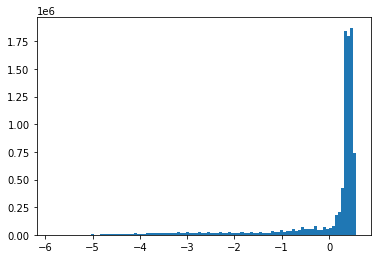

In [84]:
hist = plt.hist(train_images_normalised.flatten(),bins=100)

In [138]:
checkpoint = ModelCheckpoint("model_{epoch:02d}",monitor='val_loss',verbose=1,save_best_only=True)
adaptiveLearningRate = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,verbose=1,min_delta=0.0001)
earlyStopping = EarlyStopping(monitor='val_loss',mode='auto',verbose=1,patience=25)
callback_list = [checkpoint,adaptiveLearningRate,earlyStopping]

In [139]:

def get_model(input_shape,num_of_class,hidden_size=64,dropout=0.5):
  input = tf.keras.Input(shape=(96,96,1))
  x_skip = input
  x = L.Conv2D(filters=32,kernel_size=(7,7),strides=(1,1), padding = 'same')(input)
  x = L.BatchNormalization()(x)
  x = L.Activation('relu')(x)
  x_skip = L.Conv2D(filters=32,kernel_size=(7,7),strides=(1,1), padding = 'same')(x_skip)
  x = L.Concatenate()([x, x_skip]) 
  x = L.MaxPool2D(pool_size=(2,2))(x)

  
  x_skip = x
  x = L.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1), padding = 'same')(x)
  x = L.BatchNormalization()(x)
  x = L.Activation('relu')(x)
  x_skip = L.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1), padding = 'same')(x_skip)
  x = L.Concatenate()([x, x_skip]) 
  x = L.MaxPool2D(pool_size=(2,2))(x)

  
  x_skip = x
  x = L.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1), padding = 'same')(x)
  x = L.BatchNormalization()(x)
  x = L.Activation('relu')(x) 
  x_skip = L.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1), padding = 'same')(x_skip)
  x = L.Concatenate()([x, x_skip]) 
  x = L.MaxPool2D(pool_size=(2,2))(x)

  x_skip = x
  x = L.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1), padding = 'same')(x)
  x = L.BatchNormalization()(x)
  x = L.Activation('relu')(x) 
  x_skip = L.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1), padding = 'same')(x_skip)
  x = L.Concatenate()([x, x_skip]) 
  x = L.MaxPool2D(pool_size=(2,2))(x)

  x = L.Flatten()(x)
  x = L.Dense(hidden_size)(x)
  x = L.BatchNormalization()(x)
  x = L.Activation('relu')(x)
  x = L.Dropout(dropout)(x)
  x = L.Dense(num_of_class,activation="softmax")(x)
  model = tf.keras.Model(input,x)
  return model

In [ ]:
input_shape = (96,96,1)
num_of_class = len(lb.classes_)
K.clear_session()
model=get_model(input_shape,num_of_class)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy())
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [141]:
BATCH_SIZE = 32
EPOCHS = 50
model.fit(
    Augmented_training.flow(np.expand_dims(val_images_normalised,3),val_label_onehot,batch_size=BATCH_SIZE),
    steps_per_epoch = len(np.expand_dims(val_images_normalised,3))//BATCH_SIZE,
    validation_data = (train_images_normalised,train_label_onehot),
    validation_steps=len(train_images_normalised)//BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = callback_list
)

Epoch 1/50
90/90 [==============================] - 9s 85ms/step - loss: 0.9229 - categorical_accuracy: 0.6341 - val_loss: 2.1270 - val_categorical_accuracy: 0.3619

Epoch 00001: val_loss improved from inf to 2.12700, saving model to model_01
INFO:tensorflow:Assets written to: model_01/assets
Epoch 2/50
90/90 [==============================] - 7s 80ms/step - loss: 0.4577 - categorical_accuracy: 0.8516 - val_loss: 2.5479 - val_categorical_accuracy: 0.2320

Epoch 00002: val_loss did not improve from 2.12700
Epoch 3/50
90/90 [==============================] - 8s 83ms/step - loss: 0.3358 - categorical_accuracy: 0.9058 - val_loss: 1.8393 - val_categorical_accuracy: 0.4495

Epoch 00003: val_loss improved from 2.12700 to 1.83931, saving model to model_03
INFO:tensorflow:Assets written to: model_03/assets
Epoch 4/50
90/90 [==============================] - 7s 79ms/step - loss: 0.2491 - categorical_accuracy: 0.9382 - val_loss: 0.9914 - val_categorical_accuracy: 0.6165

Epoch 00004: val_loss imp

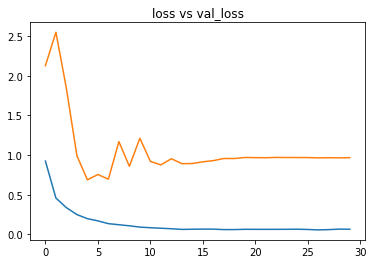

In [142]:
fig=plt.figure()
plt.plot(model.history.history["loss"],label="loss")
plt.plot(model.history.history["val_loss"],label="val_loss")
plt.title("loss vs val_loss")
plt.show()

In [143]:
prediction = model.predict(train_images_normalised)
print(classification_report(train_label_onehot.argmax(axis=1),prediction.argmax(axis=1),target_names=lb.classes_))

              precision    recall  f1-score   support

    airplane       0.59      0.87      0.70       194
      animal       0.98      0.31      0.48       194
         car       0.75      0.76      0.76       194
       human       0.79      0.78      0.79       194
       truck       0.82      0.98      0.89       194

    accuracy                           0.74       970
   macro avg       0.79      0.74      0.72       970
weighted avg       0.79      0.74      0.72       970



In [144]:
prediction = model.predict(val_images_normalised)
print(classification_report(val_label_onehot.argmax(axis=1),prediction.argmax(axis=1),target_names=lb.classes_))

              precision    recall  f1-score   support

    airplane       1.00      1.00      1.00       582
      animal       1.00      1.00      1.00       582
         car       1.00      1.00      1.00       582
       human       1.00      1.00      1.00       582
       truck       1.00      1.00      1.00       582

    accuracy                           1.00      2910
   macro avg       1.00      1.00      1.00      2910
weighted avg       1.00      1.00      1.00      2910



In [179]:
prediction = model.predict(test_images_normalised)

In [165]:
prediction.shape

(1940, 5)

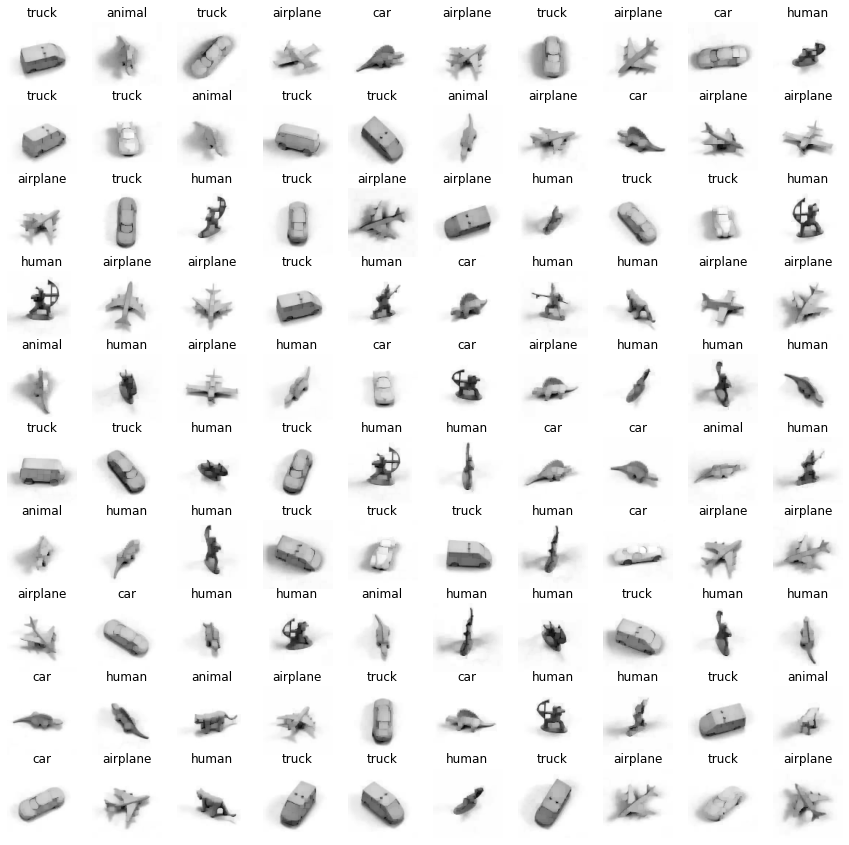

In [167]:
fig, axs = plt.subplots(10, 10,figsize=(15,15))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(test_images[i*10+j],cmap=plt.cm.gray)
    axs[i,j].set_title(lb.classes_[prediction[i*10+j].argmax()])
    axs[i,j].axis('off')

In [ ]:
!cat Sample_Submission.csv

In [170]:
import pandas as pd

In [184]:
sample = pd.read_csv('Sample_Submission.csv')
sample

,Image_Name,Label
0,028562_00_lt.jpg,airplane
1,026222_00_lt.jpg,airplane
2,028230_00_lt.jpg,animal
3,028020_00_lt.jpg,animal
4,024421_00_lt.jpg,human
...,...,...
965,026492_00_lt.jpg,airplane
966,028683_00_lt.jpg,truck
967,028891_00_lt.jpg,human
968,027992_00_lt.jpg,airplane


In [ ]:
data = []
for i,path in enumerate(test_images_path):
  print(path.split(os.sep)[-1],lb.classes_[prediction[i].argmax()])
  data.append([path.split(os.sep)[-1],lb.classes_[prediction[i].argmax()]])


In [188]:
pd = pd.DataFrame(data=data,columns=['Image_Name','Label'])

In [189]:
pd.to_csv("Submission.csv")

In [ ]:
drive.flush_and_unmount()